#Machine Learning: Random Forest

##CIFAR-10

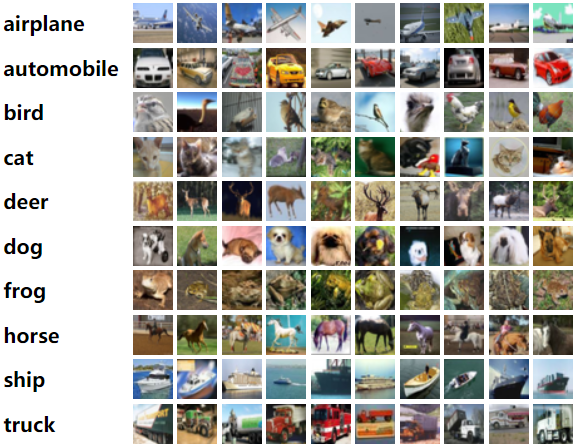

## Carregar pacotes e base de dados

In [1]:
# Pacotes que serão utilizados ao longo do script
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.feature import hog
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Configurando a semente
seed_value = 0

np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [2]:
# Carregando a base de dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
#                   0           1           2       3     4       5       6       7       8       9
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Função para mapear os labels numéricos para os nomes das classes
def map_labels_to_class_names(labels, class_names):
    return np.array([class_names[label[0]] for label in labels])

# Mapear os labels de treino e teste para os nomes das classes
y_train = map_labels_to_class_names(y_train, class_names)
y_test = map_labels_to_class_names(y_test, class_names)

In [5]:
y_train[0:5]

array(['frog', 'truck', 'truck', 'deer', 'automobile'], dtype='<U10')

In [6]:
import numpy as np

def select_classes(X, y, classes, num_samples):
    indices = []
    for cls in classes:
        cls_idx = np.where(y == cls)[0][:num_samples]
        indices.extend(cls_idx)
    return X[indices], y[indices]

# Definir classes e número de amostras por classe
classes_to_select = class_names[0:2]
num_samples_per_class = 5000

# Selecionar amostras para treino
X_train, y_train = select_classes(X_train, y_train, classes_to_select, num_samples_per_class)

# Selecionar amostras para teste
X_test, y_test = select_classes(X_test, y_test, classes_to_select, num_samples_per_class)

In [7]:
print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Train data shape: (10000, 32, 32, 3)
Test data shape: (2000, 32, 32, 3)
Train labels shape: (10000,)
Test labels shape: (2000,)


In [8]:
test_unique_values, test_counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", test_unique_values)
print("Contagens:", test_counts)

Valores únicos: ['airplane' 'automobile']
Contagens: [1000 1000]


In [9]:
test_unique_values, test_counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", test_unique_values)
print("Contagens:", test_counts)

Valores únicos: ['airplane' 'automobile']
Contagens: [1000 1000]


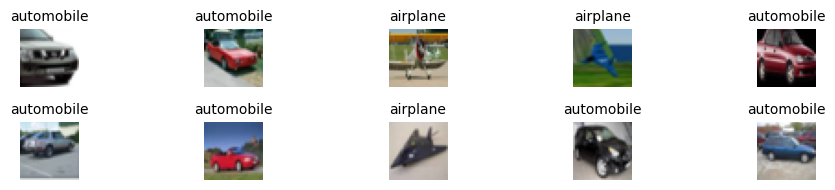

In [10]:
plt.figure(figsize=(10, 2))
for i in range(10):
  rnd = random.randint(0, len(X_train))
  image = X_train[rnd]
  true_label = y_train[rnd]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'{true_label}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

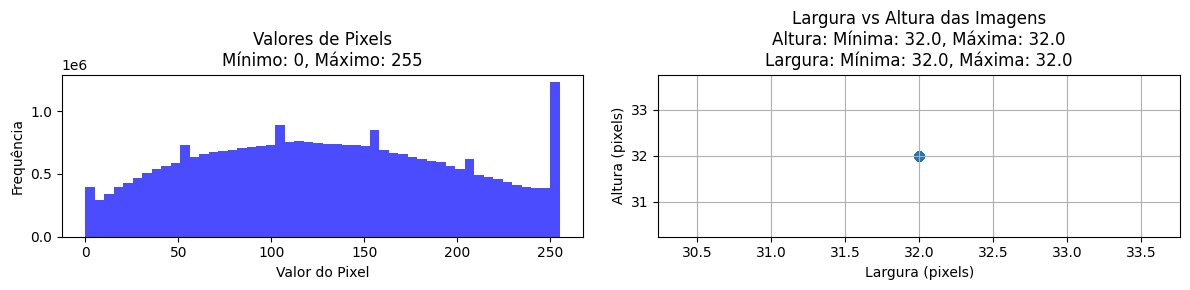

In [11]:
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(X_train)
pixel_max = np.max(X_train)

# Obter dimensões das imagens
image_heights = X_train.shape[1] * np.ones(X_train.shape[0])
image_widths = X_train.shape[2] * np.ones(X_train.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

##Normalização

In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Vetorização dos pixels

In [13]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print(X_train_flat.shape)
print(X_test_flat.shape)

(10000, 3072)
(2000, 3072)


## Random Forest como classificador

In [14]:
# Treinamento de um modelo Random Forest
def train(X_train, y_train, n_estimators=100):
  model = RandomForestClassifier(n_estimators=n_estimators)
  model.fit(X_train, y_train.flatten())
  return model

model = train(X_train_flat, y_train)

Resultados de Teste
Acurácia: 0.883
F1 score: 0.8829700403303246


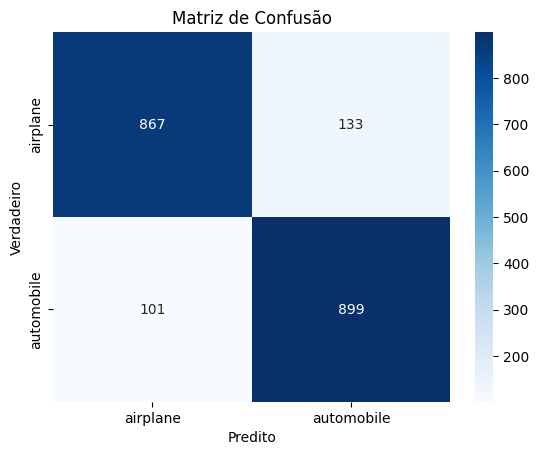

Resultados de Treino
Acurácia: 1.0
F1 score: 1.0


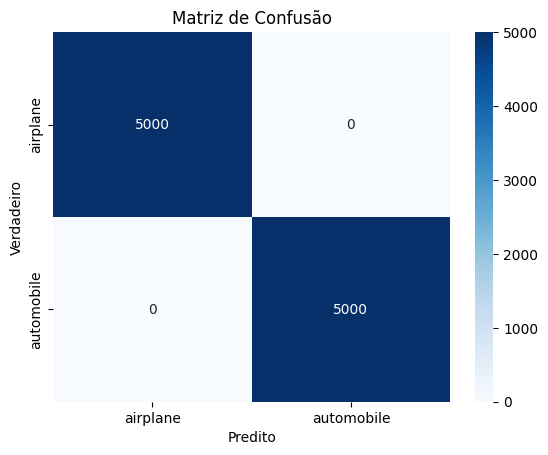

In [15]:
# Inferência e avaliação
def predict_and_evaluate(model, X_test, y_test, normalize=None):

  # Inferência
  y_pred = model.predict(X_test)

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred, normalize=normalize)

  fmt = '.2f' if normalize == 'true' else 'd'
  sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

print('Resultados de Teste')
predict_and_evaluate(model, X_test_flat, y_test)
print('Resultados de Treino')
predict_and_evaluate(model, X_train_flat, y_train)

##Utilizar atributos extraídos da imagens ao invés do pixels e retreino

O Histogram of Oriented Gradients (HOG) é uma técnica para extração de features de imagens. Ela descreve a aparência e a forma local de um objeto dentro de uma imagem calculando a intensidade dos gradientes das bordas e a orientação dentro de regiões localizadas de uma imagem (capturando forma e estrutura de um objeto).

**Computacionalmente mais eficiente que uma rede extratora de atributos, como uma CNN, mas é invariante a mudanças de escala e rotação.

In [16]:
# Extração de características utilizando HOG
def extract_hog_features(images):
    hog_features = []
    hog_images = []
    for image in images:
        features, img = hog(image, orientations=9,      # o número de direções angulares distintas para as quais os gradientes são calculados
                              pixels_per_cell=(8, 8),   # tamanho (em pixels) de cada célula na qual a imagem é dividida para calcular o histograma de gradientes orientados
                              cells_per_block=(2, 2),   # número de células em cada bloco. Os blocos são usados para normalizar os histogramas de gradientes dentro de células, melhorando a robustez a variações de iluminação e contraste.
                              visualize=True,           # se a imagem HOG (uma representação visual das características HOG) deve ser retornada junto com o vetor de características.
                              channel_axis=-1)          # índice do eixo do canal na imagem de entrada.
        hog_features.append(features)
        hog_images.append(img)
    return np.array(hog_features), hog_images

# Extraindo características HOG dos dados de treinamento e teste
X_train_hog, train_hog_images = extract_hog_features(X_train)
X_test_hog, _ = extract_hog_features(X_test)

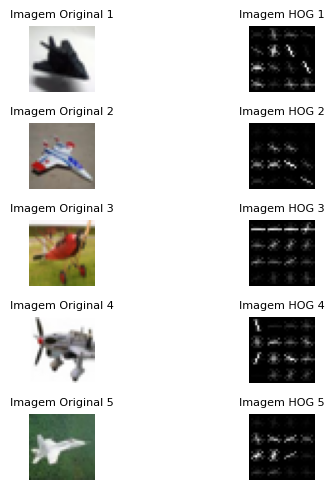

In [17]:
# Visualizar imagens HOG
def visualize_multiple_hog(images, hog_images, images_to_show=5):
    plt.figure(figsize=(6, images_to_show))

    for i in range(images_to_show):
        # Mostrar imagem original
        plt.subplot(images_to_show, 2, 2 * i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Imagem Original {i+1}', fontsize=8)
        plt.axis('off')

        # Mostrar imagem HOG
        plt.subplot(images_to_show, 2, 2 * i + 2)
        plt.imshow(hog_images[i], cmap='gray')
        plt.title(f'Imagem HOG {i+1}', fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Exemplo de visualização das primeiras n imagens do conjunto de treinamento
images_to_show = 5
visualize_multiple_hog(X_train, train_hog_images, images_to_show=images_to_show)

In [18]:
# Atributos extraídos
X_train_hog.shape

(10000, 324)

Resultados de Teste
Acurácia: 0.9055
F1 score: 0.9054852320675106


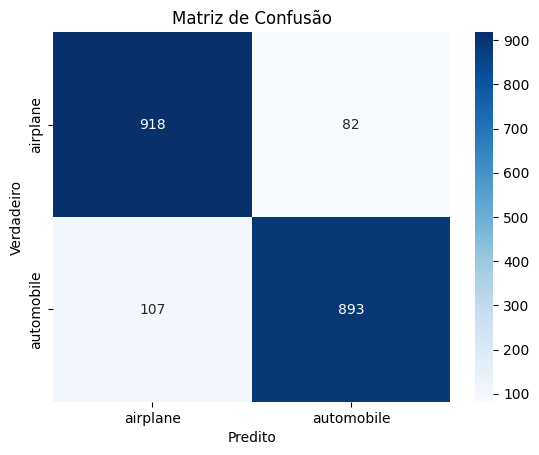

Resultados de Treino
Acurácia: 1.0
F1 score: 1.0


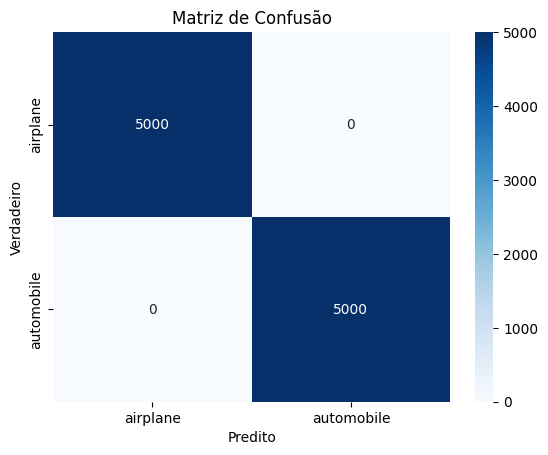

In [19]:
model = train(X_train_hog, y_train)

print('Resultados de Teste')
predict_and_evaluate(model, X_test_hog, y_test)
print('Resultados de Treino')
predict_and_evaluate(model, X_train_hog, y_train)

Acurácia: 0.9055
F1 score: 0.9054852320675106


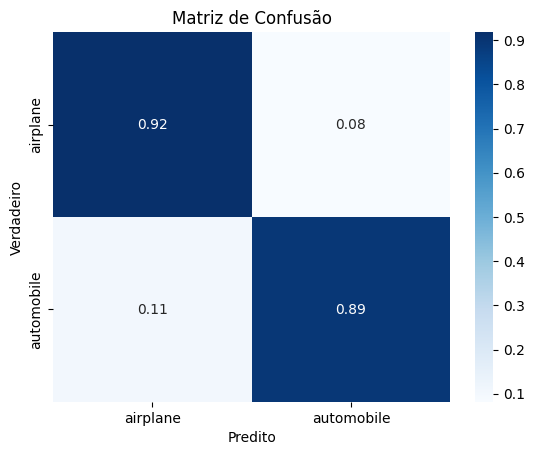

In [20]:
predict_and_evaluate(model, X_test_hog, y_test, normalize='true')

## Tuining de parâmetros utilizando uma abordagem de força bruta: GridSearch com Validação Cruzada

In [21]:
from sklearn.model_selection import GridSearchCV

# Parâmetros a serem testados para reduzir overfitting!
tuned_parameters = [{'n_estimators': [50, 100, 200],
                     'min_samples_leaf': [3, 5, 7]}]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(n_jobs=-1), tuned_parameters, scoring='f1_macro')
model.fit(X_train_hog, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'min_samples_leaf': [3, 5, 7],
                          'n_estimators': [50, 100, 200]}],
             scoring='f1_macro')

In [22]:
# Melhores parâmetros
model.best_params_

{'min_samples_leaf': 3, 'n_estimators': 200}

Resultados de Teste
Acurácia: 0.9065
F1 score: 0.906497171539439


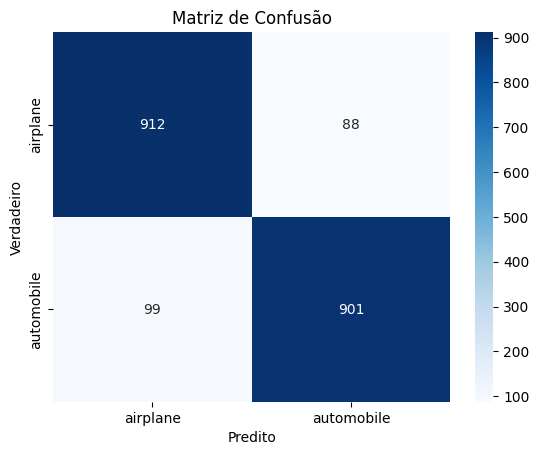

Resultados de Treino
Acurácia: 0.9993
F1 score: 0.999299999993


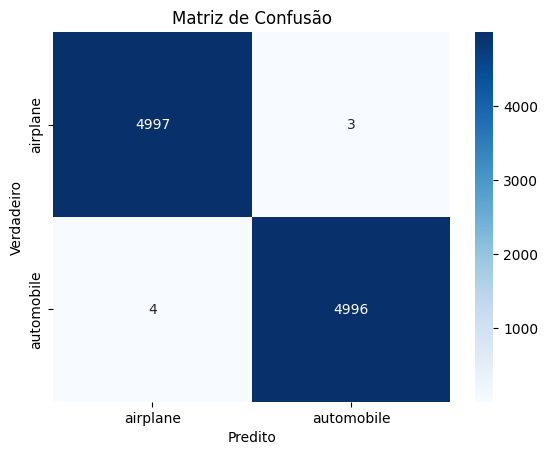

In [23]:
print('Resultados de Teste')
predict_and_evaluate(model, X_test_hog, y_test)
print('Resultados de Treino')
predict_and_evaluate(model, X_train_hog, y_train)